# Predicting car prices using KNN model

In this project, we'll use take advantage of the machine learning (ML) workflow to predict a car's market price using its attributs. 

The [data set](https://archive.ics.uci.edu/ml/datasets/automobile) was created by Jeffrey C. Schilimmer (1985) and uploaded to the UCI's ML Repository. It contains information on various cars. For each car we have information about the technical aspects of the vehicle such as the motor's displacement, the weight of the car, the miles per gallon, how fast the car accelerates, and more.

## Data set preview

The raw data set has no headers. So we're going to add headers to it, thanks to the [documentation](https://archive.ics.uci.edu/ml/datasets/automobile).

In [1]:
import pandas as pd
pd.options.display.max_columns = 500

headers = ['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration', 'num_doors', 'body_style', 'drive_wheels',
          'engine_location', 'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_type', 'num_cylinders',
          'engine_size', 'fuel_system', 'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg', 
          'highway_mpg', 'price']
cars = pd.read_csv('car.data', names = headers)
cars.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


To fit a ML model, we need 2 conditions:
- the features (which is ordinally numeric columns) and the target (for instance that is the `price` column), the columns with other value types will be removed ;
- the data has no missing values.

For the first condition, we're determining the columns with continuous values, based on this [documentation](https://archive.ics.uci.edu/ml/datasets/automobile):

In [2]:
cols_numeric = ['normalized_losses', 'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_size',
               'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price']

cars = cars[cols_numeric]
cars.head(30)

,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.00,111,5000,21,27,13495
1,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.00,111,5000,21,27,16500
2,?,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.00,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.00,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.00,115,5500,18,22,17450
5,?,99.8,177.3,66.3,53.1,2507,136,3.19,3.40,8.50,110,5500,19,25,15250
6,158,105.8,192.7,71.4,55.7,2844,136,3.19,3.40,8.50,110,5500,19,25,17710
7,?,105.8,192.7,71.4,55.7,2954,136,3.19,3.40,8.50,110,5500,19,25,18920
8,158,105.8,192.7,71.4,55.9,3086,131,3.13,3.40,8.30,140,5500,17,20,23875
9,?,99.5,178.2,67.9,52.0,3053,131,3.13,3.40,7.00,160,5500,16,22,?


Next, for the second condition, we can tell that the `normalized_losses` column contains missing values with the "?". Let's see if the missing values in this columns hold an important part of the dataset.

In [3]:
import numpy as np
cars = cars.replace("?", np.nan)
cars = cars.astype('float')
cars.isnull().sum()

normalized_losses    41
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_size           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64

In [4]:
# because 'price' is the target column (that we want tp predict), let's remove any rows with missing 'price' values
cars = cars.dropna(subset=['price'])
cars.isnull().sum()

normalized_losses    37
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_size           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 0
dtype: int64

Looking back to the `normalized_losses`, since the missing values hold up to 18% of the total, we decided to keep them and and replace them with the data set mean.

In [5]:
cars = cars.fillna(cars.mean())
cars.isnull().sum()

normalized_losses    0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_size          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

Great ! So now we had 2 conditions. Before running some unvariate K-Nearest Neighbors models, let's rescale the columns so they all range from 0 to 1, except for the `price` column.

In [6]:
# rescale the columns
re_cars = (cars - cars.min())/(cars.max() - cars.min())

# reinitialize the 'price' column
re_cars['price'] = cars['price']
re_cars.head()

,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,13495.0
1,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.343396,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.181132,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.283019,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895,17450.0


## Univariate Model 

We are going to run the model in 2 ways:
- Firstly, training the model on every single column, with the default n_neighbors = 5.
- Secondly, training the model on every single column, with changing the n_neighbors.

And find out what model gives the lowest Root Mean Squared Error (RMSE).

**Training model with default n_neighbors = 5.**

In [7]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt

# building the model 
def knn_train_test(df, train_column, target_column):
    knn = KNeighborsRegressor()
    np.random.seed(1)
    
    shuffled_index = np.random.permutation(df.index)    # randomize order of rows in dataframe
    random_df = df.reindex(shuffled_index)
    
    half_length = int(len(random_df) / 2)         # divide number of rows in haf and round
    
    train_df = random_df.iloc[0:half_length]    # select the first half as training set
    test_df = random_df.iloc[half_length:]      # select the second half as test set
    
    knn.fit(train_df[[train_column]], train_df[target_column])    # fit the model to data
    predictions = knn.predict(test_df[[train_column]])            # make predictions
    
    rmse = sqrt(mean_squared_error(test_df[target_column], predictions))      # find the RMSE
    return rmse

# remove 'price' column from the training bloc
train_cols = cols_numeric
train_cols.remove('price')

# create a dictionary that displays the RMSE of each column
rmses = {}

for col in train_cols:
    value_rmse = knn_train_test(re_cars, col, 'price')
    rmses[col] = value_rmse

rmses_sorted = pd.Series(rmses).sort_values()
rmses_sorted

engine_size          3238.462830
horsepower           4037.037713
curb_weight          4401.118255
highway_mpg          4630.026799
width                4704.482590
city_mpg             4766.422505
length               5427.200961
wheel_base           5461.553998
compression_ratio    6610.812153
bore                 6780.627785
normalized_losses    7330.197653
peak_rpm             7697.459696
stroke               8006.529545
height               8144.441043
dtype: float64

According to the results, the `engine_size` column give the lowest RMSE with roughly 3238.

**Now, let's start running the model on each column with several n_neighbors k = 1, 3, 5, 7, 9.**

In [8]:
# rebuild the model
def knn_train_test(df, train_column, target_column):
    
    np.random.seed(1)
    shuffled_index = np.random.permutation(df.index)
    random_df = df.reindex(shuffled_index)
    
    half_len = int(len(random_df) / 2)
    train_df = random_df.iloc[0:half_len]
    test_df = random_df.iloc[half_len:]
    
    k_values = [1,3,5,7,9]
    k_rmses = {}
    
    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[[train_column]], train_df[target_column])
        predictions = knn.predict(test_df[[train_column]])
        rmse = sqrt(mean_squared_error(test_df[target_column], predictions))
        k_rmses[k] = rmse
    return k_rmses

k_rmses_dict = {}
# run the model
for col in train_cols:
    k_rmses_dict[col] = knn_train_test(re_cars, col, 'price')
    
k_rmses_dict

{'normalized_losses': {1: 7846.750605148984,
  3: 7500.5698123109905,
  5: 7330.197653434445,
  7: 7756.421586234123,
  9: 7688.096096891432},
 'wheel_base': {1: 4493.734068810494,
  3: 5120.161506064513,
  5: 5461.553997873057,
  7: 5448.1070513823315,
  9: 5738.405685192312},
 'length': {1: 4628.45550121557,
  3: 5129.8358210721635,
  5: 5427.2009608367125,
  7: 5313.427720847974,
  9: 5383.054514833446},
 'width': {1: 4559.257297950061,
  3: 4606.413692169901,
  5: 4704.482589704386,
  7: 4571.485046194653,
  9: 4652.914172067787},
 'height': {1: 8904.04645636071,
  3: 8277.609643045525,
  5: 8144.441042663747,
  7: 7679.598124393773,
  9: 7811.03606291223},
 'curb_weight': {1: 5264.290230758878,
  3: 5022.318011757233,
  5: 4401.118254793124,
  7: 4330.608104418053,
  9: 4632.044474454401},
 'engine_size': {1: 3258.4861059962027,
  3: 2840.562805643501,
  5: 3238.4628296477176,
  7: 3563.086774256415,
  9: 3831.8244149840766},
 'bore': {1: 8602.58848450066,
  3: 6984.239489480916,


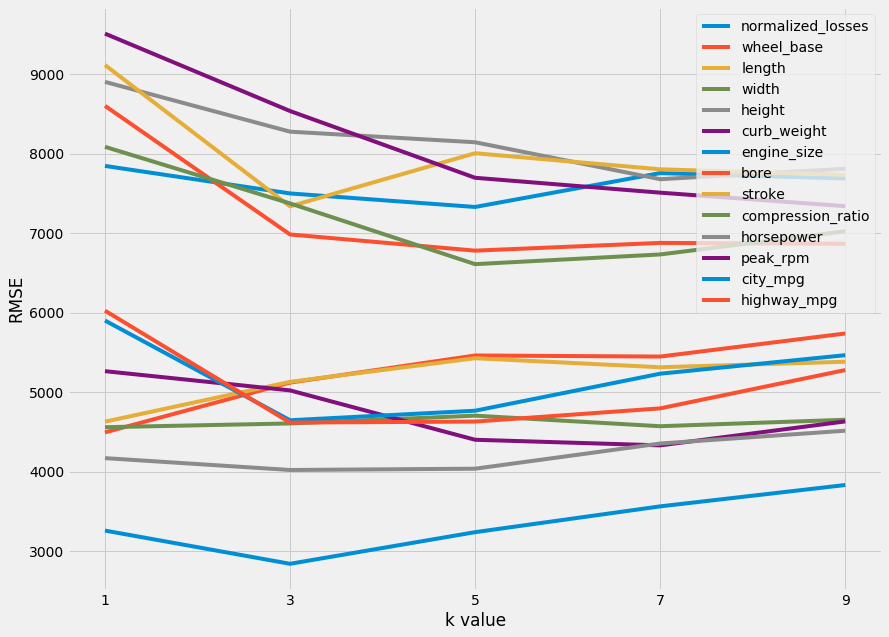

In [15]:
# Visualize the results
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

from numpy import arange

plt.figure(figsize=(13,10))

for k, v in k_rmses_dict.items():
    x = list(v.keys())
    y = list(v.values())
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.xticks(arange(1,10,2))
    plt.ylabel('RMSE')

label = k_rmses_dict.keys()
plt.legend(label)

plt.show()

At every k value, the `engine_size` always returns the lowest RMSE.

## Multivariate model

This time, let's train the model with **multiple** columns, using the default n_neighbors = 5.

In [10]:
# build a function accepting a list of columns
def knn_train_test(df, list_columns, target_column):
    
    np.random.seed(1)
    shuffled_index = np.random.permutation(df.index)
    random_df = df.reindex(shuffled_index)
    
    half_len = int(len(random_df) / 2)
    train_df = df.iloc[0:half_len]
    test_df = df.iloc[half_len:]

    knn = KNeighborsRegressor()
    knn.fit(train_df[list_columns], train_df[target_column])
    predictions = knn.predict(test_df[list_columns])
    rmse = sqrt(mean_squared_error(test_df[target_column], predictions))
    return rmse

# train and test using all of the columns
rmse_all_cols = knn_train_test(re_cars, train_cols, 'price')
rmse_all_cols

5100.039644691573

Let's using the best features from the UNIVARIATE MODEL step to train and test the model. We're using respectively 2, 3, 4 and 5 best features that return the lowest RMSEs.

In [11]:
best_2f = ['engine_size', 'horsepower']
best_3f = ['engine_size', 'horsepower', 'curb_weight']
best_4f = ['engine_size', 'horsepower', 'curb_weight', 'highway_mpg']
best_5f = ['engine_size', 'horsepower', 'curb_weight', 'highway_mpg', 'width']

bests_rmses = {}

rmse_2f = knn_train_test(re_cars, best_2f, 'price')
bests_rmses['two best features'] = rmse_2f

rmse_3f = knn_train_test(re_cars, best_3f, 'price')
bests_rmses['three best features'] = rmse_3f

rmse_4f = knn_train_test(re_cars, best_4f, 'price')
bests_rmses['four best features'] = rmse_4f

rmse_5f = knn_train_test(re_cars, best_5f, 'price')
bests_rmses['five best features'] = rmse_5f

bests_rmses

{'two best features': 3501.733879942991,
 'three best features': 3971.2426530128964,
 'four best features': 3972.319923203219,
 'five best features': 4529.620040892115}

## Hyperparameter Optimizing

For the top 3 model in the last step, let's vary the hyperparameter value from 1 to 25 and plot the RMSE results.

In [17]:
def knn_train_test(df, list_columns, target_column):
    np.random.seed(1)
    shuffled_index = np.random.permutation(df.index)
    random_df = df.reindex(shuffled_index)
    
    half_len = int(len(random_df) / 2)
    train_df = random_df.iloc[0:half_len]
    test_df = random_df.iloc[half_len:]
    
    hyper_params = [i for i in range(1,25)]
    k_rmses = {}
    
    for k in hyper_params: 
        knn = KNeighborsRegressor(n_neighbors = k)
        knn.fit(train_df[list_columns], train_df[target_column])
        predictions = knn.predict(test_df[list_columns])
            
        rmse = sqrt(mean_squared_error(test_df[target_column], predictions))
        k_rmses[k] = rmse
    return k_rmses
    
k_bests_rmses = {}

best_2f = ['engine_size', 'horsepower']
best_3f = ['engine_size', 'horsepower', 'curb_weight']
best_4f = ['engine_size', 'horsepower', 'curb_weight', 'highway_mpg']

k_rmse_2f = knn_train_test(re_cars, best_2f, 'price')
k_bests_rmses['two best features'] = k_rmse_2f

k_rmse_3f = knn_train_test(re_cars, best_3f, 'price')
k_bests_rmses['three best features'] = k_rmse_3f

k_rmse_4f = knn_train_test(re_cars, best_4f, 'price')
k_bests_rmses['four best features'] = k_rmse_4f

k_bests_rmses

{'two best features': {1: 2783.6204237227344,
  2: 2657.7963807419765,
  3: 2792.586573031673,
  4: 2891.5329686923255,
  5: 2949.8817277180374,
  6: 3096.402601694776,
  7: 3164.681969020496,
  8: 3413.228359192009,
  9: 3748.6716603306486,
  10: 4080.7125057341937,
  11: 4215.6372280600335,
  12: 4275.421524277872,
  13: 4373.901683035496,
  14: 4424.285137239815,
  15: 4539.505493095937,
  16: 4667.307671446768,
  17: 4729.605305844226,
  18: 4790.556632159094,
  19: 4824.3866193292615,
  20: 4840.850914693829,
  21: 4837.429062000271,
  22: 4831.16988267597,
  23: 4861.679492959275,
  24: 4903.346008862579},
 'three best features': {1: 3131.798233957262,
  2: 3005.5737903777945,
  3: 3016.72346189447,
  4: 3144.445503247916,
  5: 3435.2601095401815,
  6: 3490.638342356411,
  7: 3734.328302612299,
  8: 3936.1203798667007,
  9: 3976.4878693193755,
  10: 4124.277723900439,
  11: 4213.73633336988,
  12: 4230.509703492906,
  13: 4176.851250534326,
  14: 4292.415585753593,
  15: 4382.501

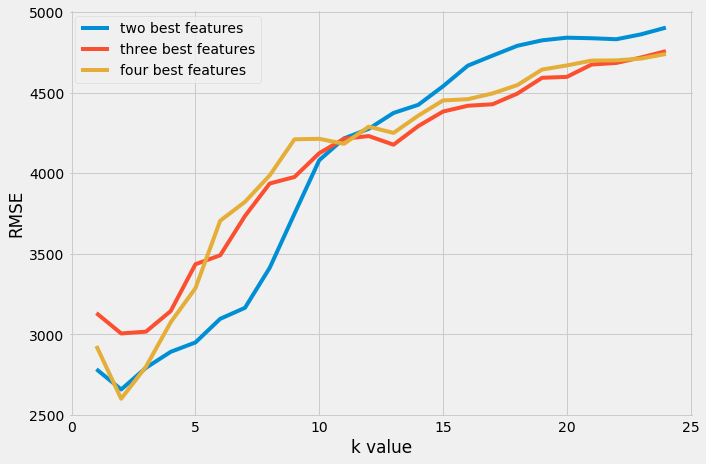

In [22]:
plt.figure(figsize=(10,7))

for k, v in k_bests_rmses.items():
    x = list(v.keys())
    y = list(v.values())
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')

plt.legend(k_bests_rmses.keys())
plt.show()

According to the chart, **the optimal k is 2** because this is where the three models give the lowest RMSEs. And the **optimal RSME** is given when we run **four best features** at once : the size of the engine, the horsepower, the curb's weight and the highway mpg (Miles Per Gallon) of a car.

## K-Fold Cross validation

This time, instead of using train/test validation, we are going to use the k-fold cross validation.

**Let's split the data into 5 folds and training on the 'engine_size' column of the data.**

In [34]:
from sklearn.model_selection import cross_val_score, KFold

kf = KFold(5, shuffle=True, random_state=1)
knn = KNeighborsRegressor()

mses = cross_val_score(knn, re_cars[['engine_size']], re_cars[['price']], scoring = 'neg_mean_squared_error', cv=kf)
rmses = np.sqrt(np.abs(mses))
avg_rmse = np.mean(rmses)
  
avg_rmse

3169.886194196555

**Finally, let's test with different K-Fold values.**

In [38]:
k_fold = [i for i in range(3, 25)]

k_avg_rmses = []

for fold in k_fold:
    kf = KFold(fold, shuffle=True, random_state=1)
    knn = KNeighborsRegressor()
    mses = cross_val_score(knn, re_cars[['engine_size']], re_cars[['price']], scoring = 'neg_mean_squared_error', cv=kf)
    rmses = np.sqrt(np.abs(mses))
    avg_rmse = np.mean(rmses)
    k_avg_rmses.append(avg_rmse)
    print(str(fold), 'folds: ', 'avg_rmse: ', str(avg_rmse))

3 folds:  avg_rmse:  3202.929577471487
4 folds:  avg_rmse:  3287.7965804115
5 folds:  avg_rmse:  3169.886194196555
6 folds:  avg_rmse:  3219.9618739975153
7 folds:  avg_rmse:  3145.5790850045464
8 folds:  avg_rmse:  3141.847650827921
9 folds:  avg_rmse:  3119.9016946768584
10 folds:  avg_rmse:  3043.5029272033166
11 folds:  avg_rmse:  3057.0695962969926
12 folds:  avg_rmse:  3076.54354193791
13 folds:  avg_rmse:  3074.1858046630737
14 folds:  avg_rmse:  3061.5683147345017
15 folds:  avg_rmse:  3119.8137681928542
16 folds:  avg_rmse:  3034.114792141494
17 folds:  avg_rmse:  2971.0870227934392
18 folds:  avg_rmse:  3005.7876319877755
19 folds:  avg_rmse:  2991.785101307862
20 folds:  avg_rmse:  2986.658115194405
21 folds:  avg_rmse:  2930.5506169861824
22 folds:  avg_rmse:  2923.875572316964
23 folds:  avg_rmse:  2982.3891484807164
24 folds:  avg_rmse:  2953.043229943825


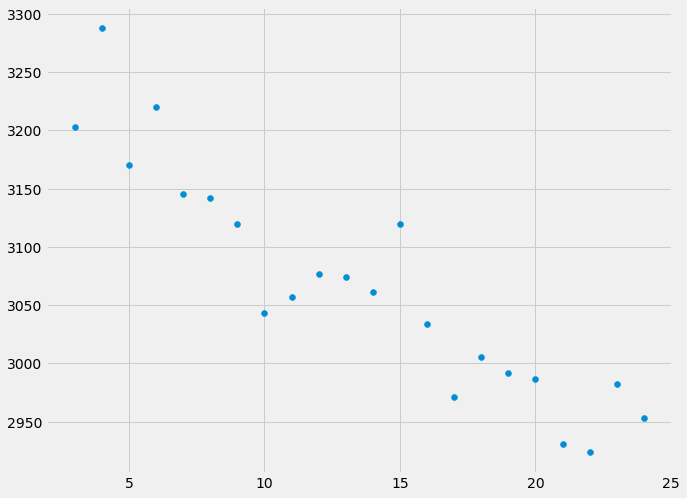

In [40]:
plt.figure(figsize=(10,8))
plt.scatter(k_fold, k_avg_rmses)
plt.show()

Generally, the higher the number of folds, the lower the average of RMSE. The lowest average is roughly 2924 when we split the data set into 22 folds.